# Import Libraries

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Clone Dataset

In [ ]:
! git clone https://github.com/PratyushPuri/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2301 (delta 0), reused 3 (delta 0), pack-reused 2298
Receiving objects: 100% (2301/2301), 1.31 GiB | 2.48 MiB/s, done.
Updating files: 100% (2296/2296), done.


In [ ]:
import os
main_dir = '/content/datasets/Data'
train_dir =os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [ ]:
print(train_dir,train_covid_dir)

/content/datasets/Data/train /content/datasets/Data/train/COVID19


In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (186).jpg', 'COVID19(201).jpg', 'COVID19(356).jpg', 'COVID19(357).jpg', 'COVID19(18).jpg', 'COVID19(405).jpg', 'COVID19(179).jpg', 'COVID19(82).jpg', 'COVID19(95).jpg', 'COVID19(485).jpg']
['NORMAL(362).jpg', 'NORMAL(173).jpg', 'NORMAL(1467).jpg', 'NORMAL(1304).jpg', 'NORMAL(2).jpg', 'NORMAL(325).jpg', 'NORMAL(946).jpg', 'NORMAL(1337).jpg', 'NORMAL(454).jpg', 'NORMAL(790).jpg']
['COVID19(346).jpg', 'COVID19(499).jpg', 'COVID19(129).jpg', 'COVID-19 (609).jpg', 'COVID19(465).jpg', 'COVID-19 (878).jpg', 'COVID-19 (516).jpg', 'COVID-19 (799).jpg', 'COVID-19 (791).jpg', 'COVID19(505).jpg']
['NORMAL(314).jpg', 'NORMAL(75).jpg', 'NORMAL(1239).jpg', 'NORMAL(405).jpg', 'NORMAL(723).jpg', 'NORMAL(264).jpg', 'NORMAL(477).jpg', 'NORMAL(99).jpg', 'NORMAL(613).jpg', 'NORMAL(293).jpg']


In [ ]:
print("train dataset covid images :",len(train_covid_names))
print("train dataset normal images :",len(train_normal_names))
print("test dataset covid images :",len(test_covid_names))
print("test dataset normal images :",len(test_normal_names))
print("Total train images :",len(train_covid_names+train_normal_names))
print("Total test images :",len(test_covid_names+test_normal_names))


train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


# Data Visualization

['/content/datasets/Data/train/COVID19/COVID-19 (186).jpg', '/content/datasets/Data/train/COVID19/COVID19(201).jpg', '/content/datasets/Data/train/COVID19/COVID19(356).jpg', '/content/datasets/Data/train/COVID19/COVID19(357).jpg', '/content/datasets/Data/train/COVID19/COVID19(18).jpg', '/content/datasets/Data/train/COVID19/COVID19(405).jpg', '/content/datasets/Data/train/COVID19/COVID19(179).jpg', '/content/datasets/Data/train/COVID19/COVID19(82).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(362).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(173).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1467).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1304).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(2).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(325).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(946).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1337).jpg']


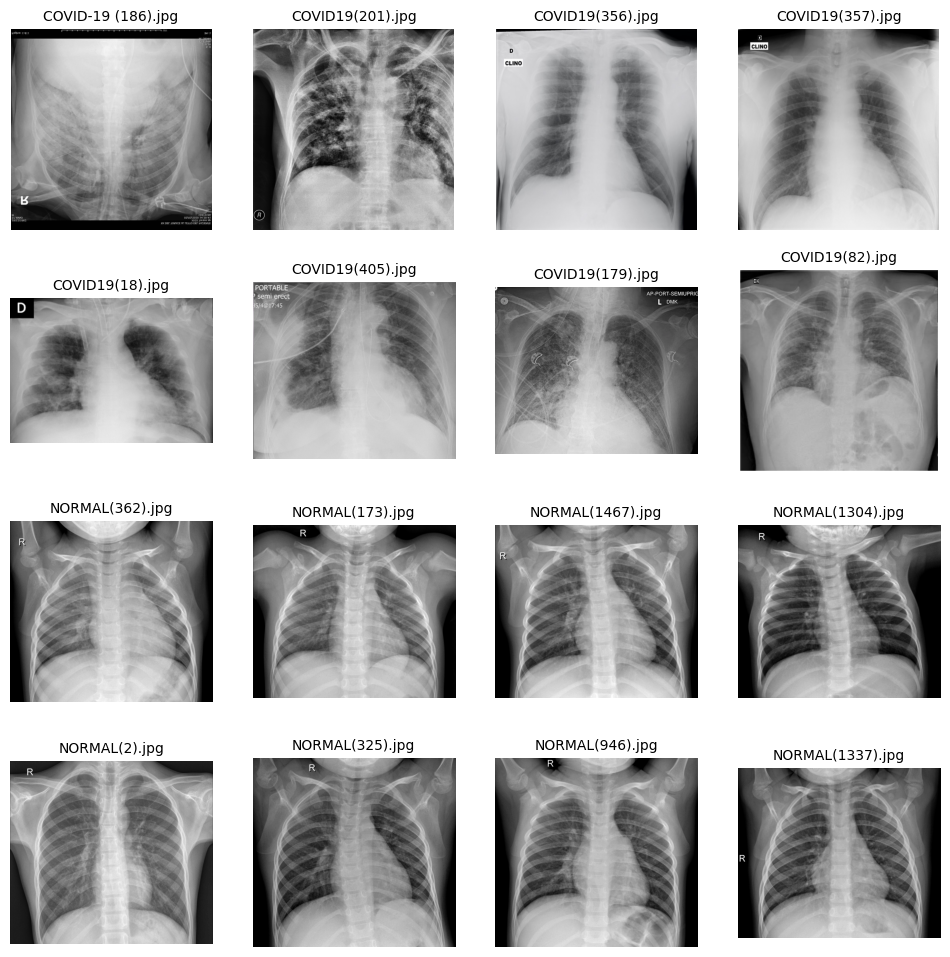

In [ ]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#set the number of columns and rows
nrows = 4
ncols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in train_normal_names[0:8]]

#print the list
print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',6)[6]
  sp =plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

# Generating Training , Validation & Testing Batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generator for our training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generator for our validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

# Generator for our test data
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150,150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

# Build CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# Compile & Train Model

In [ ]:
#compile the model
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#train the model
history = model.fit(train_generator,
                              epochs=20,
                              validation_data = validation_generator,
                              validation_steps = 10)

Epoch 1/20
46/46 [==============================] - 53s 984ms/step - loss: 1.0091 - accuracy: 0.7447 - val_loss: 0.4766 - val_accuracy: 0.8031
Epoch 2/20
46/46 [==============================] - 47s 1s/step - loss: 0.3061 - accuracy: 0.8758 - val_loss: 0.2068 - val_accuracy: 0.9375
Epoch 3/20
46/46 [==============================] - 46s 1s/step - loss: 0.1879 - accuracy: 0.9317 - val_loss: 0.1564 - val_accuracy: 0.9688
Epoch 4/20
46/46 [==============================] - 43s 948ms/step - loss: 0.1456 - accuracy: 0.9469 - val_loss: 0.1164 - val_accuracy: 0.9563
Epoch 5/20
46/46 [==============================] - 47s 1s/step - loss: 0.1394 - accuracy: 0.9455 - val_loss: 0.1059 - val_accuracy: 0.9688
Epoch 6/20
46/46 [==============================] - 45s 1s/step - loss: 0.1348 - accuracy: 0.9496 - val_loss: 0.1277 - val_accuracy: 0.9594
Epoch 7/20
46/46 [==============================] - 42s 924ms/step - loss: 0.0979 - accuracy: 0.9683 - val_loss: 0.0878 - val_accuracy: 0.9625
Epoch 8/20


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

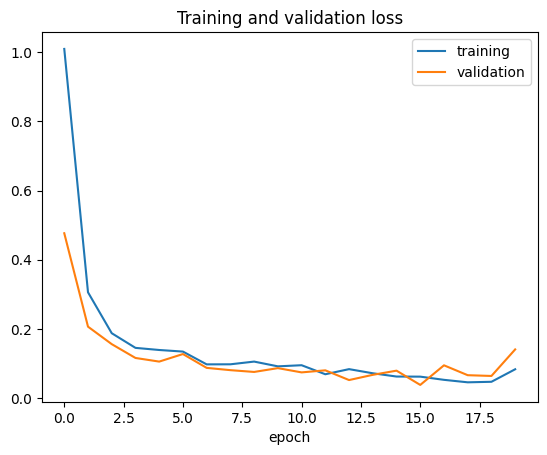

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

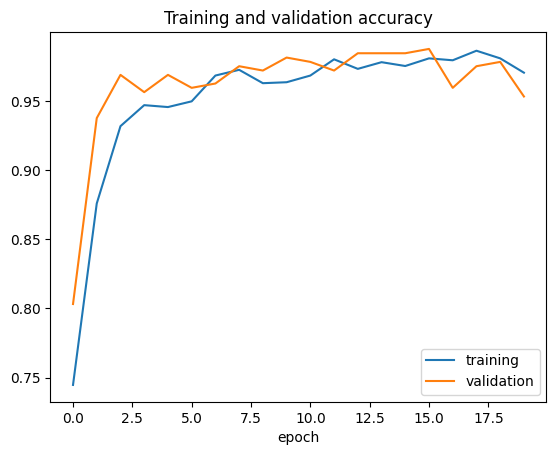

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

16/16 [==============================] - 8s 529ms/step - loss: 0.2053 - accuracy: 0.9256
test acc :0.9256198406219482 test loss:0.2053293138742447


In [ ]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')

Saving kitn.jpg to kitn.jpg
/content/kitn.jpg
1/1 [==============================] - 0s 18ms/step
kitn.jpg
Normal


In [ ]:
model.save('model.keras')